<a href="https://colab.research.google.com/github/Pakryeongmi/python_bigdata/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로지스틱 회귀

In [1]:
path = '/content/drive/MyDrive/data/Fish.csv'

In [2]:
import pandas as pd

In [8]:
fish = pd.read_csv(path)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [7]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [13]:
fish_input = fish[['Weight', 'Length2', 'Length3', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [15]:
fish_target = fish['Species'].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8991596638655462
0.75


In [22]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [23]:
kn.predict(test_scaled[:5])

array(['Perch', 'Parkki', 'Pike', 'Bream', 'Perch'], dtype=object)

In [24]:
print(test_target[:5])

['Perch' 'Parkki' 'Pike' 'Parkki' 'Perch']


In [25]:
import numpy as np

In [26]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.6667 0.     0.     0.3333 0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.6667 0.3333 0.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]]


In [27]:
print(test_scaled[3])
print(test_scaled[3:4])

[-0.33614587 -0.30232157 -0.25506158  0.57297949 -0.14512943]
[[-0.33614587 -0.30232157 -0.25506158  0.57297949 -0.14512943]]


In [30]:
_, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Bream' 'Bream' 'Parkki']]


In [31]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [34]:
xs = [x for x in np.arange(-100, 100, 0.1)]
ys = [sigmoid(x) for x in xs]

In [33]:
import matplotlib.pyplot as plt

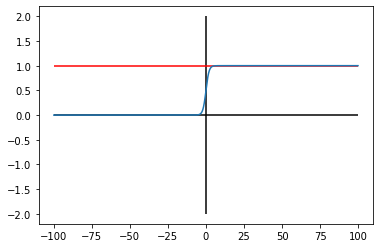

In [35]:
plt.plot(xs, ys)
plt.vlines(0,-2,2)
plt.hlines(0,-100,100)
plt.hlines(1,-100,100, colors='r')
plt.show()

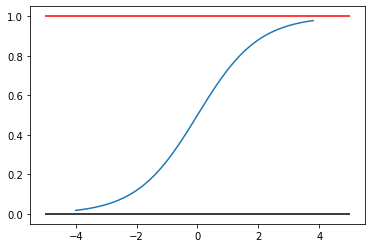

In [80]:
plt.plot(xs,ys)
#plt.vlines(0,-2,2)
plt.hlines(0,-5,5)
plt.hlines(1,-5,5,colors='r')
plt.show()

step function(계단 함수)
x > 0 => 1
x < 0 => 0

확률을 구할때는 sigmoid() 사용

In [47]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
bream_smelt_indexes2 = (test_target == 'Bream')|(test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2]

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression() #모델 생성
lr.fit(train_bream_smelt, target_bream_smelt) #공부
lr.predict(test_bream_smelt) #예측

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [50]:
print(test_target_bream_smelt)

['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [51]:
print(lr.classes_) #Bream이면 0 / Smelt이면 1

['Bream' 'Smelt']


In [52]:
print(lr.coef_, lr.intercept_)

[[-0.41785081 -0.59770638 -0.68238    -1.02931496 -0.75829079]] [-1.98829613]


In [55]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions) #음수면 0 -> Bream / 양수면 1 -> Smelt

[-7.63110434 -7.22789348 -4.11502212  3.33072993  3.39964487]


In [58]:
for d in decisions:
    print(f'{sigmoid(d):.2f}', end=' ')

0.00 0.00 0.02 0.97 0.97 

In [59]:
res = lr.predict(test_bream_smelt[:5])
print(res)

['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt']


## 로지스틱 회귀를 이용한 다중 분류

In [61]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.85


In [63]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Parkki' 'Pike' 'Bream' 'Perch']


In [64]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #밑에 있는 lr.classes_ 중 확률이 제일 높은 위치 출력값에 해당하는 데이터

[[0.    0.005 0.884 0.    0.105 0.001 0.006]
 [0.033 0.629 0.008 0.    0.256 0.    0.074]
 [0.    0.    0.023 0.946 0.024 0.004 0.003]
 [0.553 0.288 0.001 0.    0.056 0.    0.102]
 [0.001 0.    0.979 0.    0.    0.    0.02 ]]


In [65]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [66]:
print(lr.coef_) #가중치(-1.0x1 / -0.9x2 / 1.4x3 / 7.5x4 / -0.6x5) x1=Weight / x2=Length2 / x3=Length3 / x4=Height / x5=Width 7종 물고기에 대한(7줄)

[[-1.01573625 -0.93147805  1.48362871  7.57843591 -0.69849249]
 [-0.69758998 -2.26288045 -2.74078125  6.25391016 -2.14528605]
 [ 3.81021577  5.78099671 -8.99617649 -6.41177489  5.42468075]
 [ 0.00947422  3.53326753  3.81869897 -3.35428947 -1.3687579 ]
 [-2.26154444 -5.7365934   5.06058739 -0.8560605   2.64785232]
 [-0.95649223  0.88422118  1.13963044 -4.53263848 -5.46198771]
 [ 1.11167292 -1.26753352  0.23441223  1.32241728  1.60199108]]


In [67]:
print(lr.intercept_) #편향(상수?)

[ 0.19780925 -1.27745806  3.4020101   0.08147143  2.27208478 -7.39797687
  2.72205936]


In [68]:
decision = lr.decision_function(test_scaled[:5]) #coef intercept
print(np.round(decision, decimals=2))

[[ -5.27   0.39   5.66  -3.46   3.52  -1.55   0.71]
 [  0.81   3.76  -0.61  -3.92   2.86  -4.51   1.61]
 [ -4.22  -5.86   2.08   5.78   2.11   0.28  -0.15]
 [  4.89   4.23  -1.79  -3.69   2.6   -9.44   3.2 ]
 [  4.3   -5.74  11.38   2.11   1.03 -20.57   7.49]]


In [69]:
from scipy.special import softmax

In [70]:
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.005 0.884 0.    0.105 0.001 0.006]
 [0.033 0.629 0.008 0.    0.256 0.    0.074]
 [0.    0.    0.023 0.946 0.024 0.004 0.003]
 [0.553 0.288 0.001 0.    0.056 0.    0.102]
 [0.001 0.    0.979 0.    0.    0.    0.02 ]]


## 확률적 경사하강법 모델

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
sc = SGDClassifier()
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.775


In [84]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.865546218487395
0.825


In [85]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.825


In [86]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8739495798319328
0.825


In [87]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [88]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.75


In [89]:
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.75


In [90]:
import numpy as np

In [104]:
sc = SGDClassifier(loss='log')#, random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [105]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

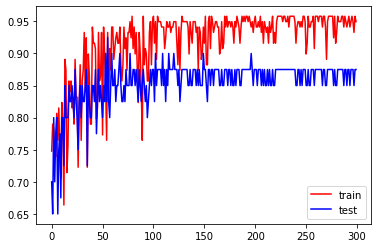

In [106]:
plt.plot(train_score, 'r', label='train')
plt.plot(test_score, 'b', label='test')
plt.legend()
plt.show()

In [109]:
for _ in range(0,300):
    sc.fit(train_scaled, train_target)#, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

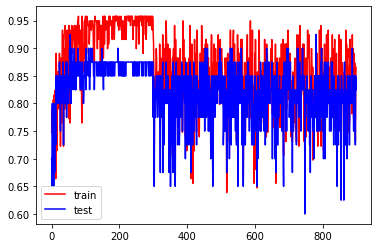

In [110]:
plt.plot(train_score, 'r', label='train')
plt.plot(test_score, 'b', label='test')
plt.legend()
plt.show()

In [111]:
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [112]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

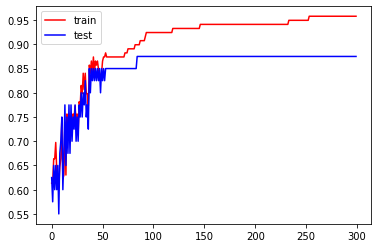

In [113]:
plt.plot(train_score, 'r', label='train')
plt.plot(test_score, 'b', label='test')
plt.legend()
plt.show()

## 결정 트리

In [116]:
path = '/content/drive/MyDrive/data/wine2.csv'
wine = pd.read_csv(path)
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [117]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [118]:
wine['class'].unique()

array([0., 1.])

In [152]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [158]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [159]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_, lr.intercept_)

0.781027515874543
0.7653846153846153
[[ 0.42469991  0.3462063  -4.04339884]] [8.43279173]


In [160]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [156]:
#train_scaled = train_input #스케일 조절하지 않았는데 한것처럼
#test_scaled = test_input

In [161]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7835289590148162
0.7692307692307693
[[ 0.51206182  1.6416425  -0.69037963]] [1.78767068]


In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9980758129690206
0.8661538461538462


In [163]:
from sklearn.tree import plot_tree

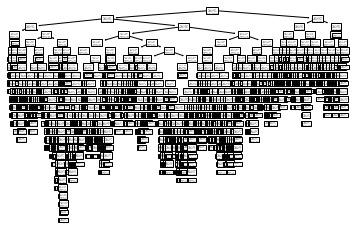

In [166]:
plot_tree(dt)
plt.show()

In [ ]:
plot_tree(dt, max_depth=2, filed=True, feature_names=['alcohol','sugar','pH'])

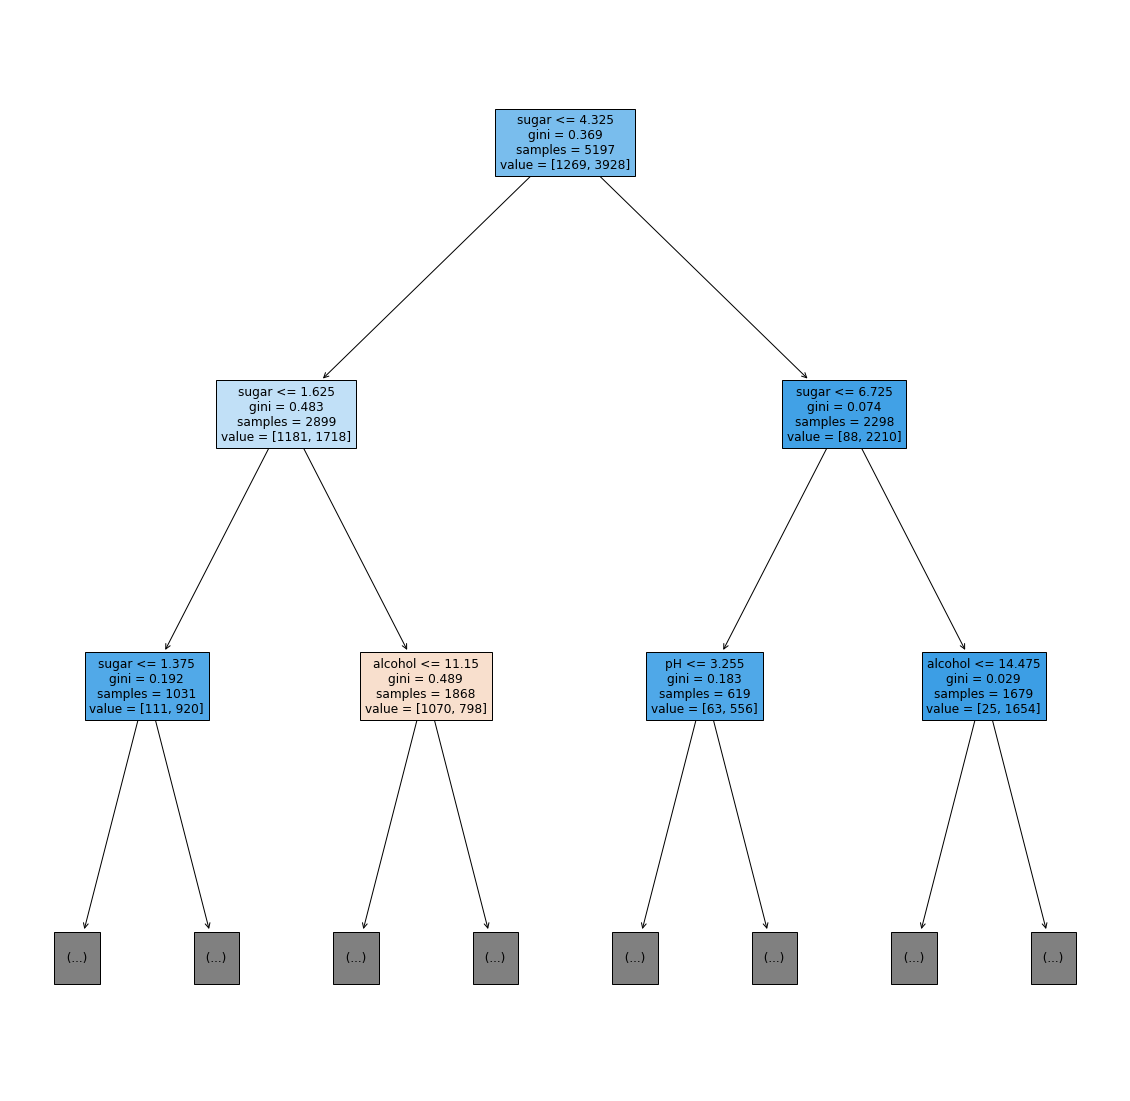

In [173]:
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=2, filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [170]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8446153846153847


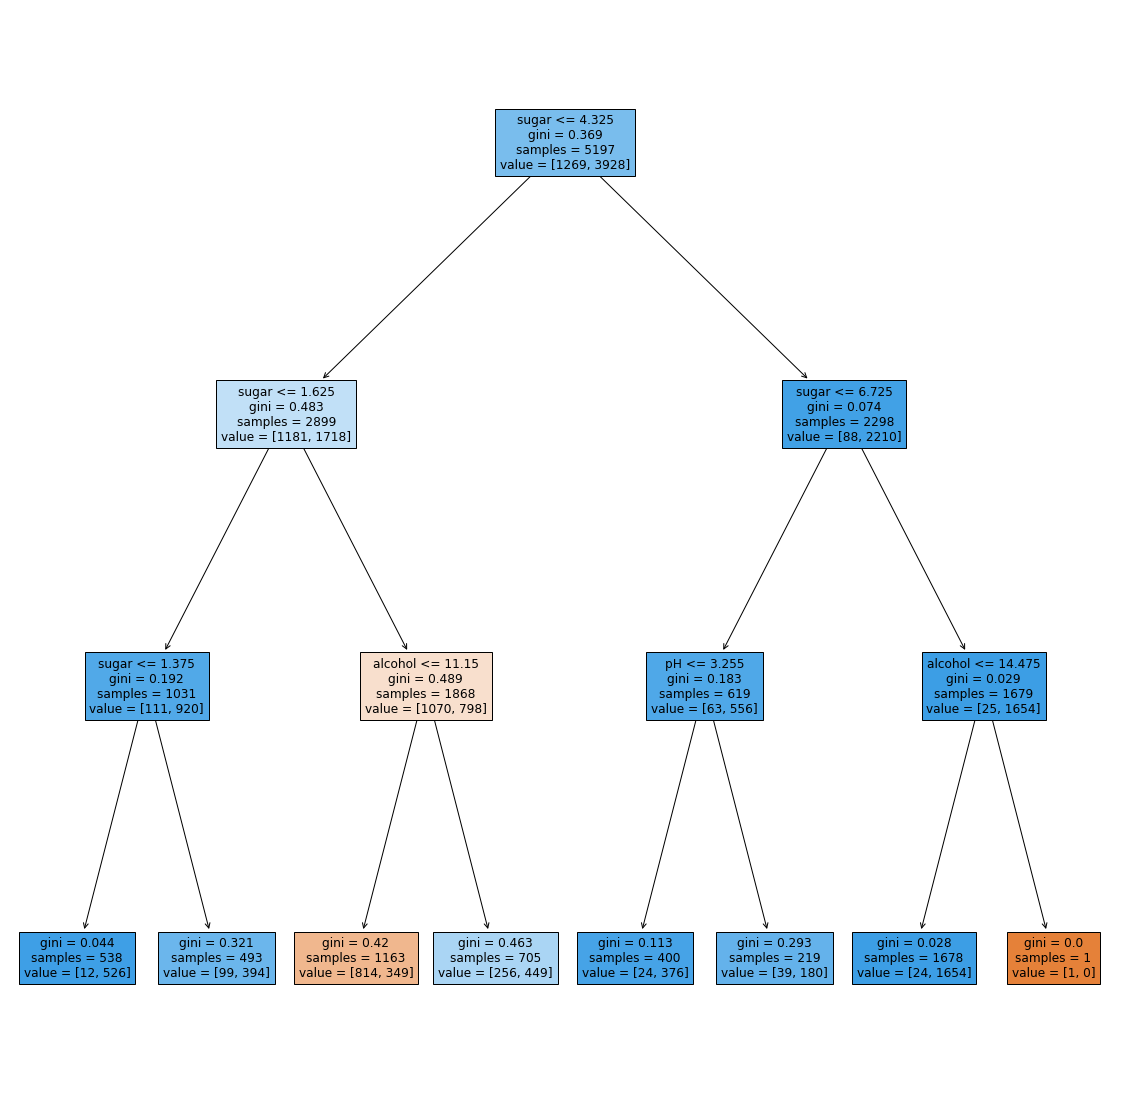

In [171]:
plt.figure(figsize=(20,20))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [175]:
print(dt.feature_importances_) #sugar가 제일 영향력이 크다

[0.13263173 0.86221216 0.00515611]


In [177]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target)

In [183]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))

0.876058506543495
0.8653846153846154
0.8738461538461538


In [184]:
from sklearn.model_selection import GridSearchCV

In [189]:
params = {'min_impurity_decrease':[0.0001, 0.001, 0.01, 0.1, 0.2]}
gs = GridSearchCV(DecisionTreeClassifier(), params)
gs.fit(train_input, train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9642101212237829
0.8869230769230769


In [190]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [191]:
print(gs.cv_results_['mean_test_score'])

[0.85914914 0.85549271 0.84452599 0.75582069 0.75582069]


In [195]:
params = {
    'min_impurity_decrease':[0.0001, 0.001, 0.01, 0.1, 0.2],
    'max_depth':range(5,20),
    'min_samples_split':range(2,100,10)
}

In [196]:
gs = GridSearchCV(DecisionTreeClassifier(), params)
gs.fit(train_input, train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8664614200500289
0.8584615384615385


In [197]:
print(gs.best_params_)

{'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}


## 앙상블

In [199]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [200]:
rf = RandomForestClassifier()
scores = cross_validate(rf, train_input, train_target, return_train_score=True)
print(scores)

{'fit_time': array([0.46054053, 0.56369042, 0.5657475 , 0.52128315, 0.52367783]), 'score_time': array([0.04306602, 0.04836893, 0.04499149, 0.03719878, 0.04207087]), 'test_score': array([0.87692308, 0.88461538, 0.88065448, 0.88835419, 0.89124158]), 'train_score': array([0.99855665, 0.99807554, 0.998076  , 0.9983165 , 0.9983165 ])}


In [201]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9982682362764151 0.8843577404308876


In [202]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23037233 0.49682223 0.27280545]


In [203]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.9980758129690206
0.91
